In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Classification

In [2]:
setA = np.random.randn(50, 2) + np.array([5, 3])
labelA = np.array([[1] for i in range(50)])
setB = np.random.randn(50, 2) + np.array([1, -1])
labelB = np.array([[0] for i in range(50)])

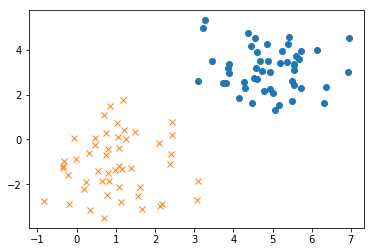

In [3]:
plt.plot(setA[:, 0], setA[:, 1], 'o')
plt.plot(setB[:, 0], setB[:, 1], 'x')

plt.show()

## Sigmoid function

$$
\sigma (x) = \frac{1}{1 + e^{-x}} = \frac{1}{1 + \exp(-x)}
$$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
x_range = np.arange(-10, 10, 0.1)
y_sigmoid = sigmoid(x_range)

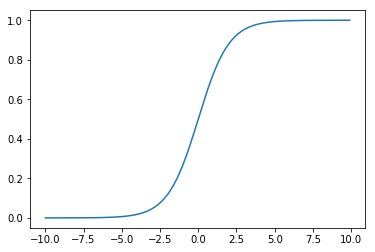

In [6]:
plt.plot(x_range, y_sigmoid)
plt.show()

## Logistic Regression

$$
f(x; w, b) = \sigma(x \cdot w + b) 
$$

In [7]:
wx = 0.5
wy = -0.4
b = -0.2

def compute(data):
    return np.dot(data, np.array([wx, wy])) + b

In [8]:
compute(setA)

array([ 1.74669234,  1.21042492,  1.12325949,  1.47327606,  0.83898447,
        1.34372916,  1.86656946,  1.59861966,  0.94573841,  1.12684416,
        2.30753761,  0.3520539 ,  1.0798981 ,  0.66012287,  0.54827088,
        0.91155247,  0.6835061 ,  1.03298883,  1.03290205,  0.55838902,
        2.06105273,  1.81377395,  0.40882828, -0.69176167,  0.97048673,
        1.25081372,  1.22417301,  0.73153954,  0.84578623,  1.36992355,
        1.76469825,  0.30790062,  0.08969168,  1.39112324,  0.53727616,
        1.50698257,  0.2553635 ,  1.46086508,  2.04755999,  1.10860236,
        0.70354011,  1.27601662,  0.1262448 , -0.57494977,  0.81766522,
        1.32967794,  0.46257291,  1.01280771,  1.06359607,  0.80138313])

In [9]:
sigmoid(compute(setA))

array([ 0.85153512,  0.77037412,  0.75459282,  0.81355482,  0.69825129,
        0.79310253,  0.86606084,  0.83182537,  0.72025733,  0.75525603,
        0.90949938,  0.58711556,  0.7464747 ,  0.65928799,  0.63373433,
        0.71331774,  0.66452077,  0.73749493,  0.73747813,  0.63607971,
        0.88705968,  0.85981737,  0.60080689,  0.33364129,  0.7252165 ,
        0.77744069,  0.77279709,  0.67514302,  0.69968246,  0.7973678 ,
        0.85379711,  0.57637274,  0.5224079 ,  0.8007715 ,  0.63117856,
        0.81861359,  0.5634962 ,  0.81166495,  0.88570084,  0.75186846,
        0.66897219,  0.78177095,  0.53151935,  0.36009548,  0.69374051,
        0.79078736,  0.61362437,  0.73356926,  0.74337716,  0.69027027])

In [10]:
sigmoid(compute(setB))

array([ 0.42284286,  0.81559425,  0.53059691,  0.83093764,  0.62043783,
        0.80661719,  0.65532138,  0.53746166,  0.50352938,  0.66836851,
        0.4103175 ,  0.86778555,  0.88660623,  0.55752817,  0.76615343,
        0.70260226,  0.57962021,  0.60460007,  0.53402494,  0.50602174,
        0.5479553 ,  0.66511279,  0.69003862,  0.4357133 ,  0.71414418,
        0.68813064,  0.50759329,  0.69875928,  0.69225362,  0.71181373,
        0.72248403,  0.88938909,  0.42715951,  0.52598812,  0.91877891,
        0.778956  ,  0.59302407,  0.82459448,  0.73306837,  0.62191268,
        0.88522521,  0.71942328,  0.76564413,  0.51303869,  0.61057196,
        0.81154553,  0.70513142,  0.60099123,  0.77194566,  0.57393261])

## Maximum Likelihood

## Cost function

$$
E(x; w, b) = - \frac{1}{N} \sum_{n=1}^N t_n \log y_n + (1-t_n) \log(1-y_n)
$$


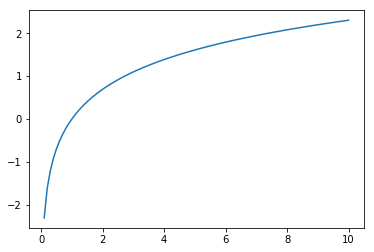

In [11]:
x_range_log = np.arange(0, 10, 0.1) + 0.1
y_log = np.log(x_range_log)
plt.plot(x_range_log, y_log)
plt.show()

In [12]:
def cost(t, y):
    return -np.mean(t * np.log(y) + (1-t) * np.log(1-y))

In [13]:
cost(
    np.array([1, 0, 0, 1]),
    np.array([0.99, 0.01, 0.01,0.99])
)

0.010050335853501451

In [14]:
cost(
    np.array([1, 0, 0, 1]),
    np.array([0.1, 0.99, 0.99, 0.1])
)

3.453877639491068

In [15]:
def classify(inputs, param):
    wx = param['wx']
    wy = param['wy']
    b = param['b']
    return sigmoid(np.dot(inputs, np.array([wx, wy])) + b)


In [16]:
sets = np.vstack([setA, setB])
labels = np.vstack([labelA, labelB])

In [17]:
classify(sets, {'wx': 0.3, 'wy': -0.4, 'b': 0.3})

array([ 0.75060818,  0.63940593,  0.62276271,  0.72537187,  0.57173319,
        0.67537344,  0.78001436,  0.72903011,  0.62223107,  0.68978856,
        0.82397142,  0.49075849,  0.60680393,  0.60222254,  0.53155231,
        0.6358933 ,  0.52457749,  0.66228504,  0.62084988,  0.56977707,
        0.76388281,  0.78567129,  0.53216111,  0.30032039,  0.63807177,
        0.65453232,  0.64876233,  0.57386964,  0.59123358,  0.7075616 ,
        0.77417481,  0.54711857,  0.42918461,  0.73048823,  0.51606362,
        0.71295612,  0.46176645,  0.6394102 ,  0.78149075,  0.63043646,
        0.6079858 ,  0.63348113,  0.48335014,  0.32771386,  0.59939009,
        0.70522792,  0.5473316 ,  0.6442979 ,  0.64054237,  0.55487457,
        0.48780866,  0.85310812,  0.62963505,  0.85529626,  0.76076402,
        0.81017397,  0.73776346,  0.65739646,  0.60304344,  0.67105182,
        0.49115841,  0.88571663,  0.89365485,  0.61970037,  0.81331615,
        0.80205035,  0.70348808,  0.66150959,  0.66909525,  0.57

In [18]:
initial_wx = np.random.rand()
initial_wy = np.random.rand()
initial_b = np.random.rand()

In [19]:
cost(
    labels,
    classify(sets, {'wx': initial_wx, 'wy': initial_wy, 'b': initial_b})
)

1.3697345949675115

In [20]:
def gradient(variables, variable_name, labels, sets):
    h = 1e-4
    input2 = variables.copy()
    input2[variable_name] += h
    
    input1 = variables.copy()
    input1[variable_name] -= h
    
#     print(input1, input2)
    
    z2 = cost(labels,classify(sets, input2))
    z1 = cost(labels,classify(sets, input1))
#     print(z1, z2)
    
    delta_z = z2 - z1
    delta_x = h * 2
    return delta_z / delta_x

In [21]:
initial_wx = np.random.rand()
initial_wy = np.random.rand()
initial_b = np.random.rand()

current_wx = initial_wx
current_wy = initial_wy
current_b = initial_b

ETA = 0.01

for iteration in range(1000):
    sets_, labels_ = shuffle(sets, labels)
    
    for (current_point, current_label) in zip(sets_, labels_):
        current = {
            'wx': current_wx,
            'wy': current_wy,
            'b': current_b
        }
        grad = {
            'wx': gradient(current, 'wx', current_label, current_point),
            'wy': gradient(current, 'wy', current_label, current_point),
            'b': gradient(current, 'b', current_label, current_point),
        }
        current_wx = current_wx - ETA * grad['wx']
        current_wy = current_wy - ETA * grad['wy']
        current_b  = current_b - ETA * grad['b']

    function_output = cost(
        labels,
        classify(sets, current)
    )
#     print("iteration: {}, {},output: {}".format(iteration, current, function_output))

{'wx': 1.8894564798586544, 'wy': 2.1132066073673483, 'b': -8.1153984524243636}


In [27]:
current = {
        'wx': current_wx,
        'wy': current_wy,
        'b': current_b
}
print(current)

{'wx': 1.8892172786546373, 'wy': 2.1132229303824954, 'b': -8.1155126787886758}


In [28]:
classify(setA, current) > 0.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [29]:
classify(setB, current) > 0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False], dtype=bool)